# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Shape

In [5]:
data.shape

(2126, 22)

# Data cleaning

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Visualizations


Text(0, 0.5, 'Count')

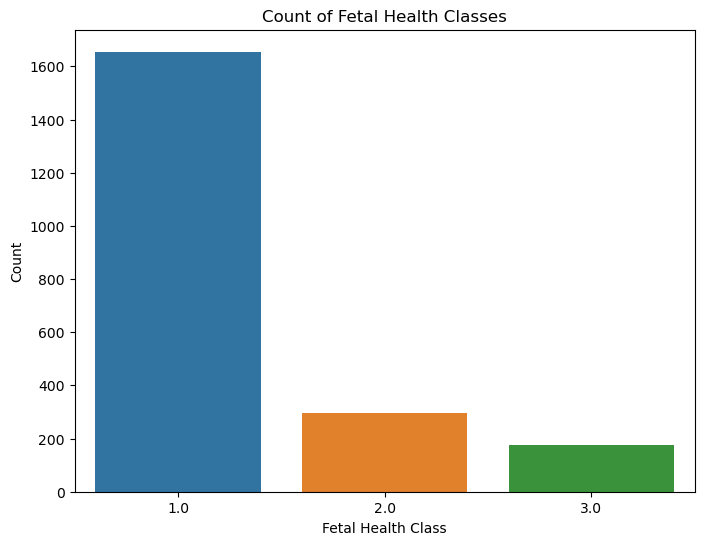

In [9]:
# 1. Countplot of Fetal Health Classes
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='fetal_health')
plt.title('Count of Fetal Health Classes')
plt.xlabel('Fetal Health Class')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

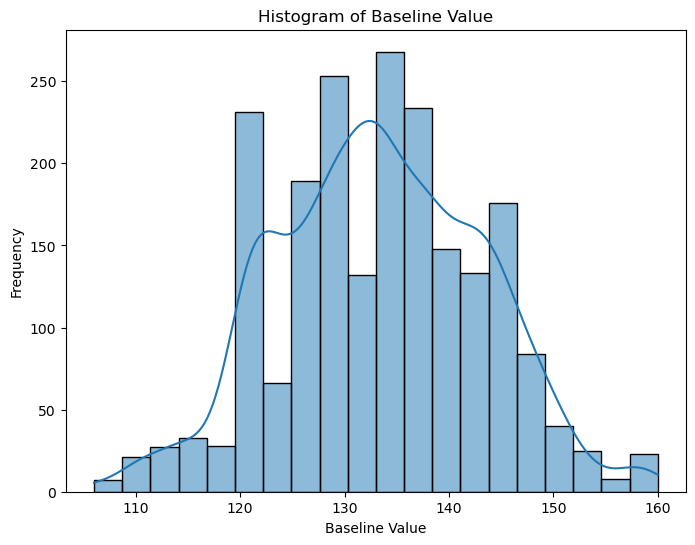

In [10]:
# 2. Histogram of Baseline Value
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='baseline value', bins=20, kde=True)
plt.title('Histogram of Baseline Value')
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fetal Movement')

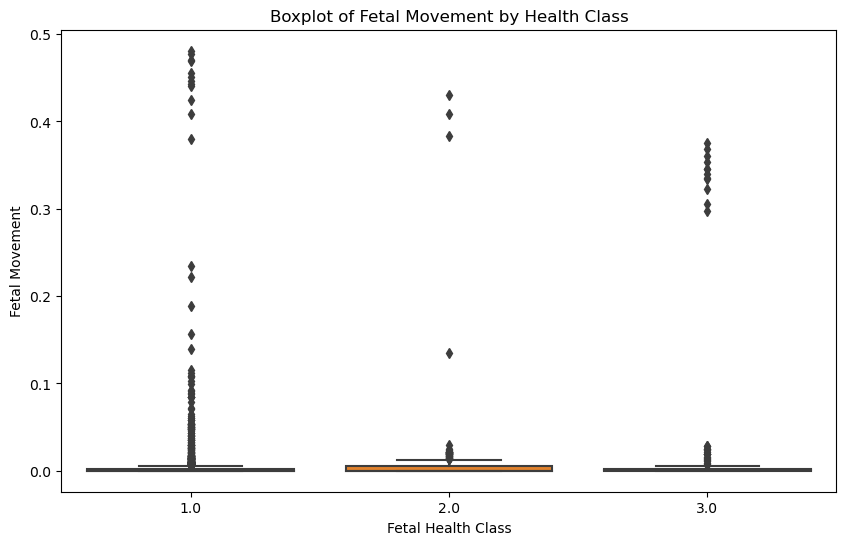

In [11]:
# 3. Boxplot of Fetal Movement by Health Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fetal_health', y='fetal_movement')
plt.title('Boxplot of Fetal Movement by Health Class')
plt.xlabel('Fetal Health Class')
plt.ylabel('Fetal Movement')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


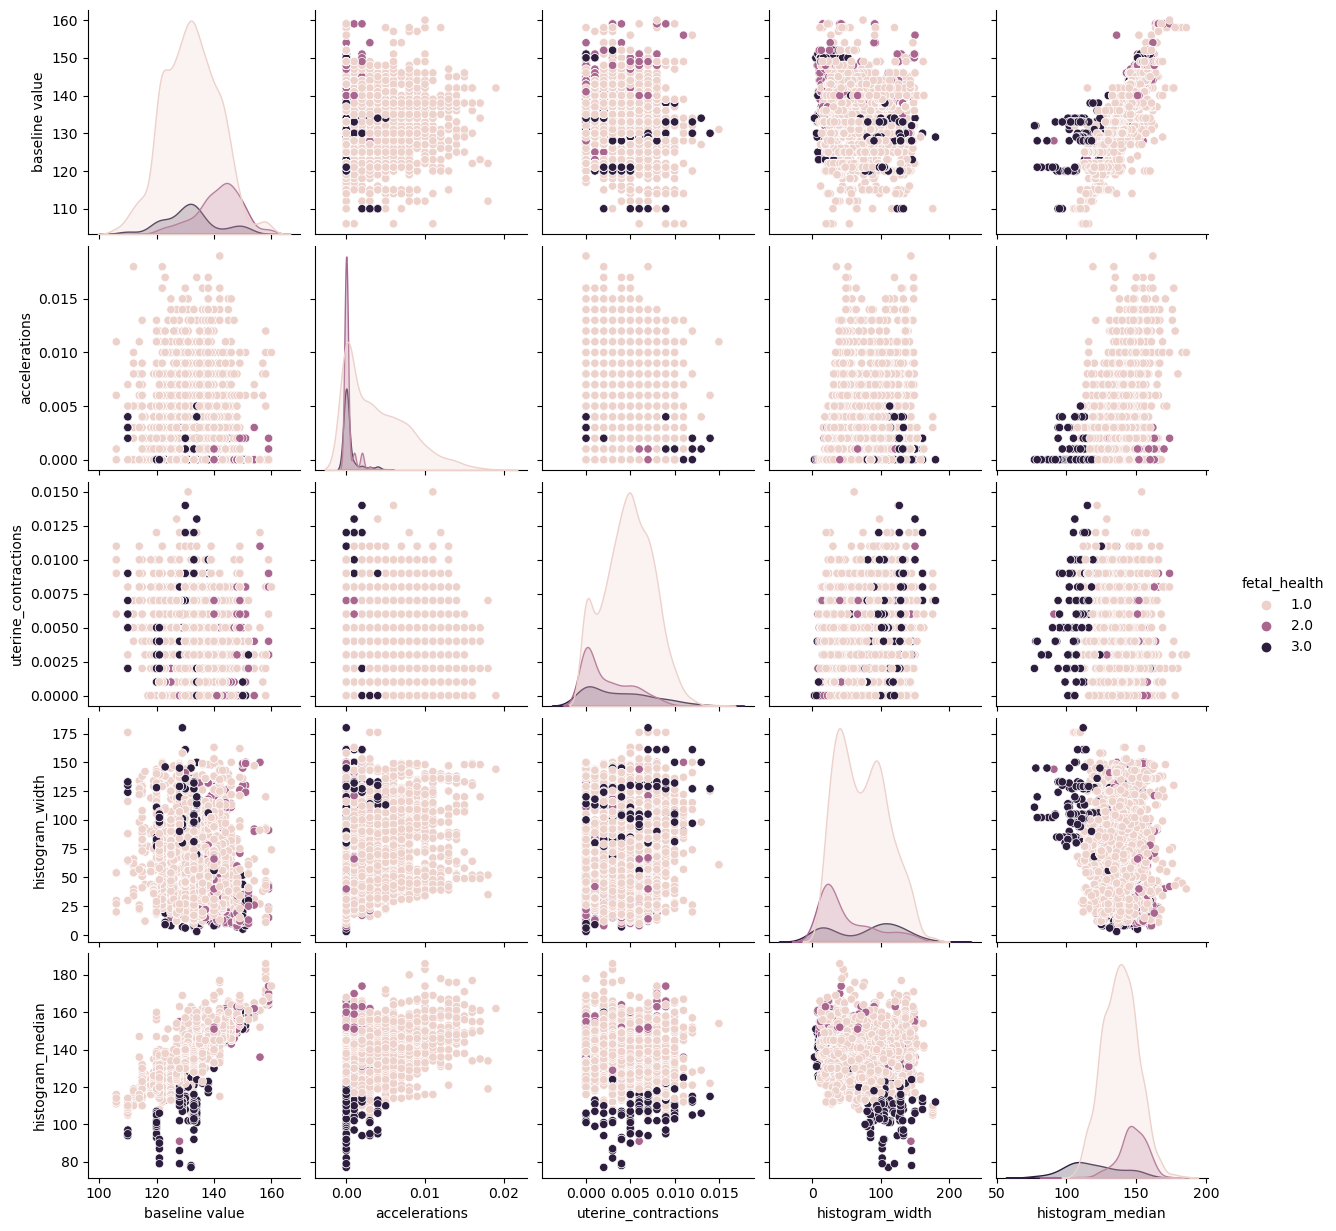

In [12]:
# 4. Pairplot of Selected Features
features = ['baseline value', 'accelerations', 'uterine_contractions', 'histogram_width', 'histogram_median']
sns.pairplot(data=data, vars=features, hue='fetal_health', diag_kind='kde')

Text(0.5, 1.0, 'Correlation Heatmap')

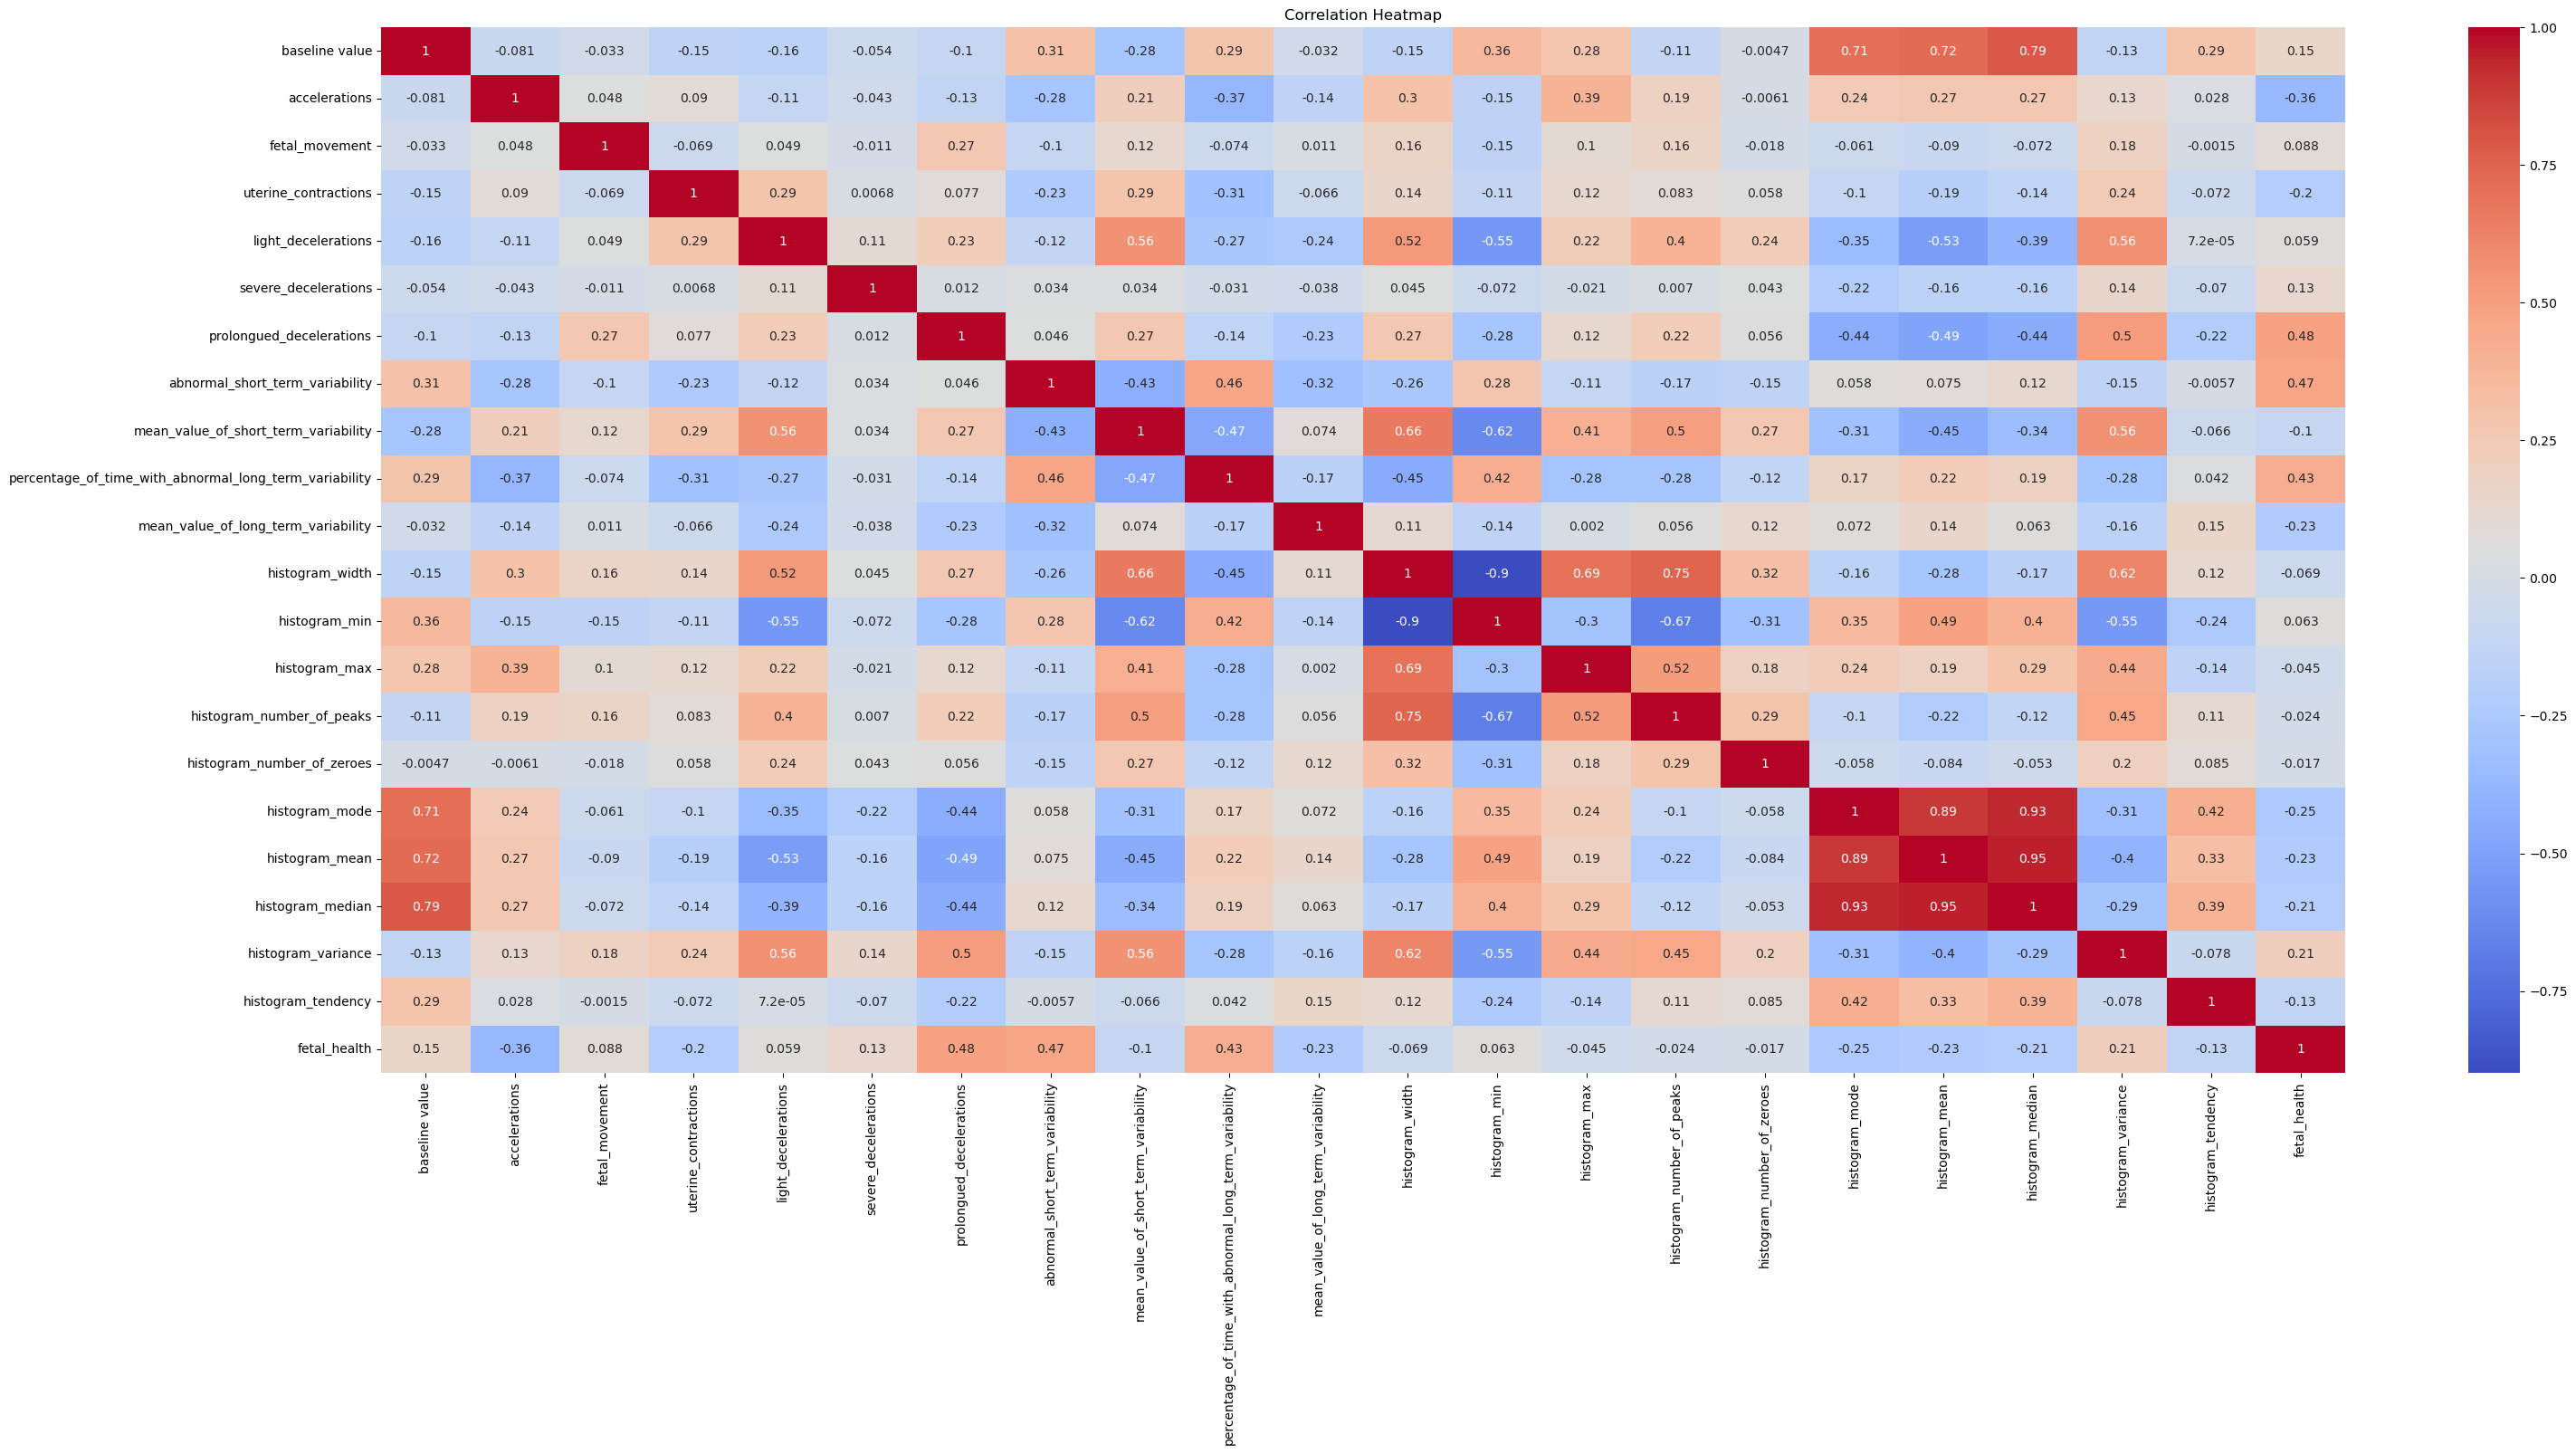

In [13]:
# 5. Correlation Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(35, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Uterine Contractions')

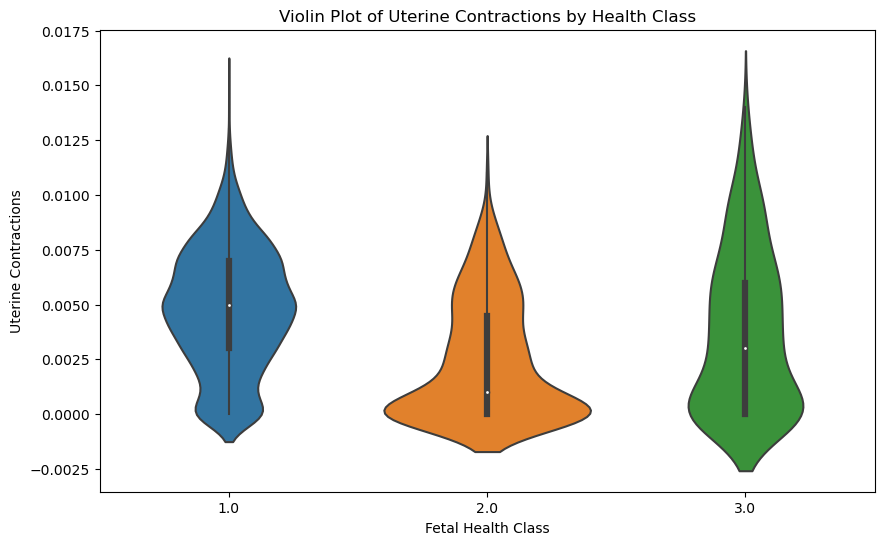

In [14]:
# 6. Violin Plot of Uterine Contractions by Health Class
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='fetal_health', y='uterine_contractions')
plt.title('Violin Plot of Uterine Contractions by Health Class')
plt.xlabel('Fetal Health Class')
plt.ylabel('Uterine Contractions')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


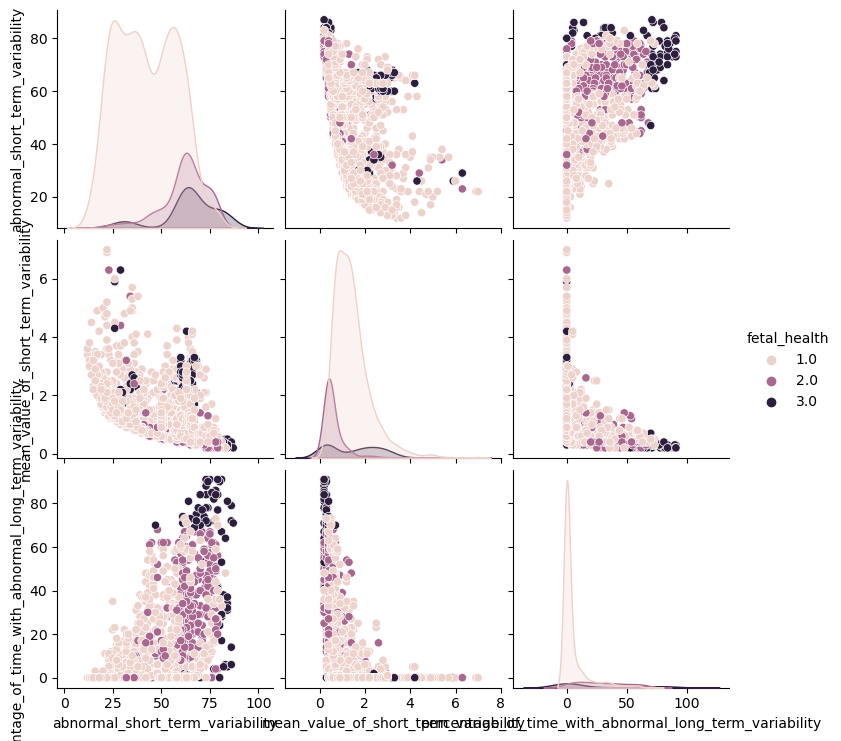

In [15]:
# 7. Pairplot of Short-Term Variability Features

stv_features = ['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']
sns.pairplot(data=data, vars=stv_features, hue='fetal_health', diag_kind='kde')

Text(0, 0.5, 'Count')

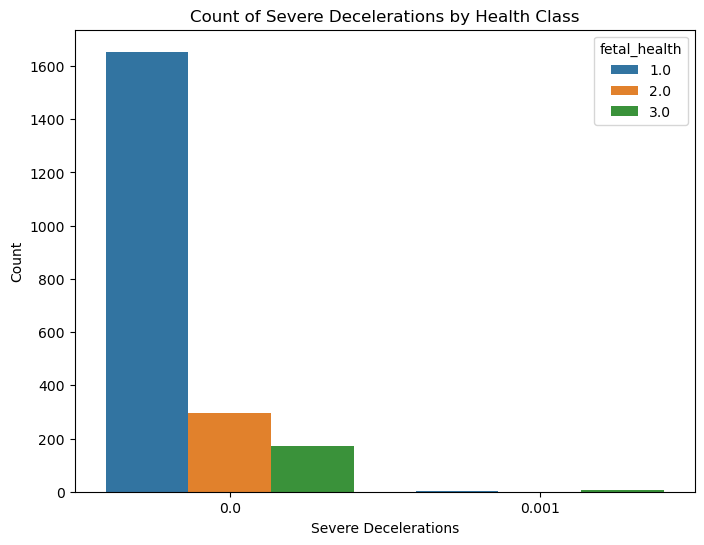

In [16]:
# 8. Countplot of Severe Decelerations by Health Class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='severe_decelerations', hue='fetal_health')
plt.title('Count of Severe Decelerations by Health Class')
plt.xlabel('Severe Decelerations')
plt.ylabel('Count')

C:\Users\vijay\AppData\Local\Temp\ipykernel_28000\494451921.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='fetal_health', y='mean_value_of_long_term_variability', ci=None)


Text(0, 0.5, 'Mean Value of Long-Term Variability')

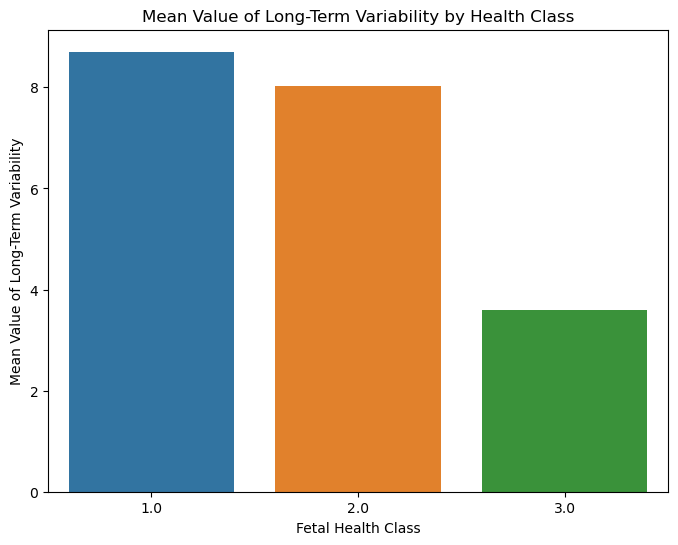

In [17]:
# 9. Barplot of Mean Value of Long-Term Variability by Health Class
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='fetal_health', y='mean_value_of_long_term_variability', ci=None)
plt.title('Mean Value of Long-Term Variability by Health Class')
plt.xlabel('Fetal Health Class')
plt.ylabel('Mean Value of Long-Term Variability')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


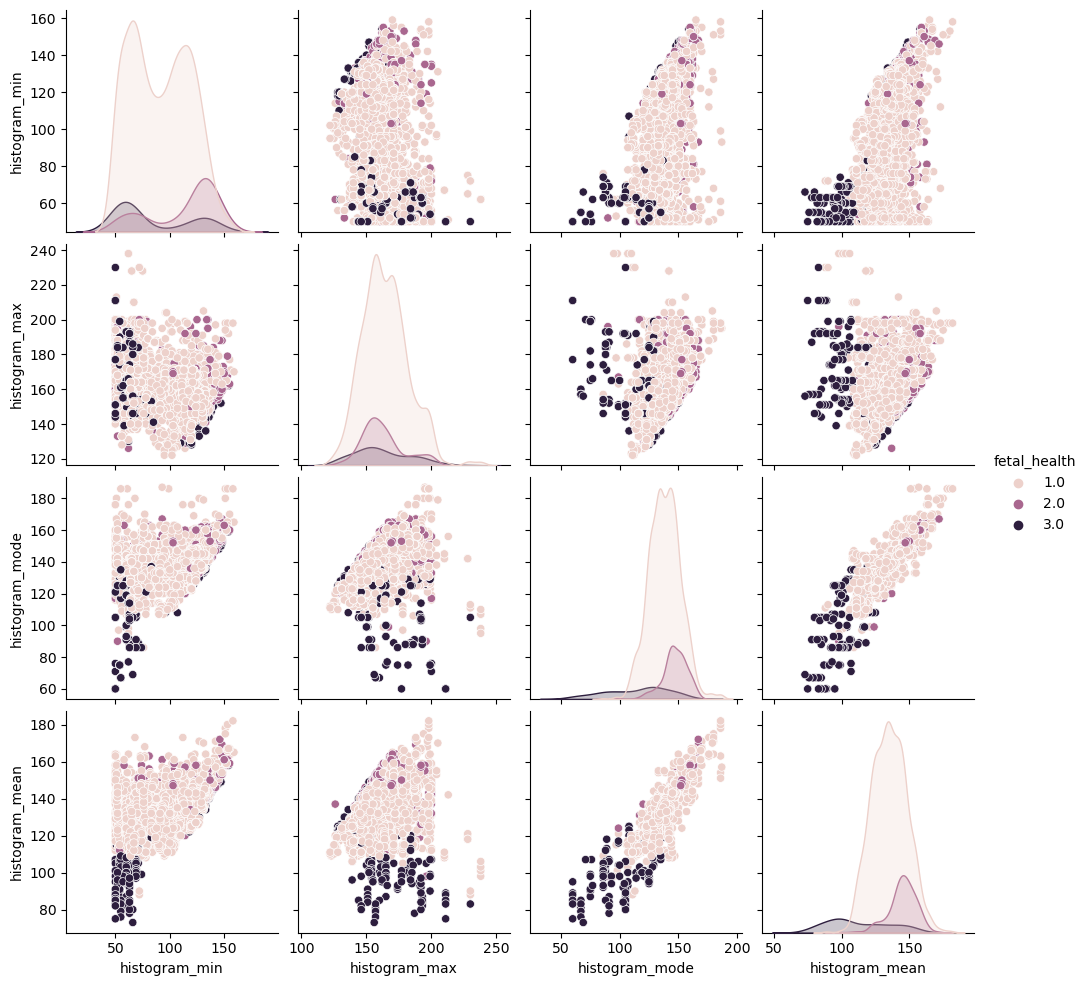

In [18]:
# 10. Pairplot of Histogram Features
histogram_features = ['histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean']
sns.pairplot(data=data, vars=histogram_features, hue='fetal_health', diag_kind='kde')


Text(0, 0.5, 'Percentage of Time with Abnormal Long-Term Variability')

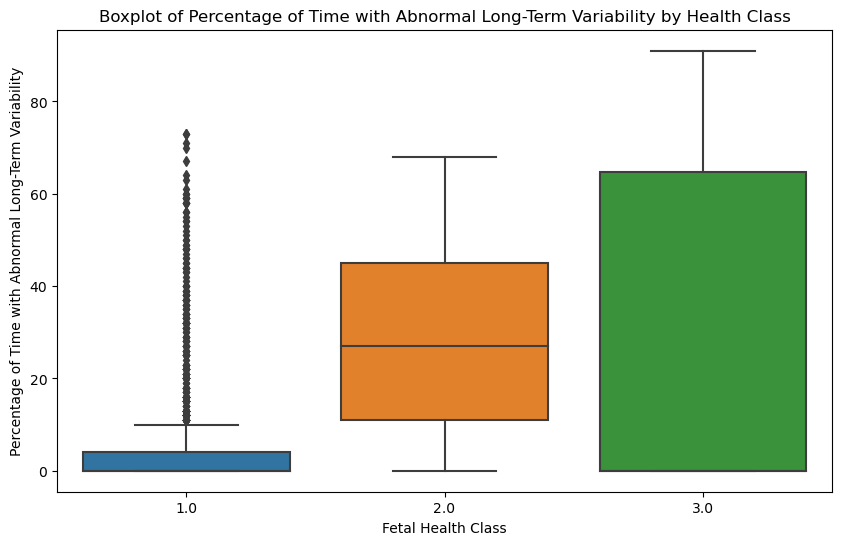

In [19]:
# 11. Boxplot of Percentage of Time with Abnormal Long-Term Variability by Health Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fetal_health', y='percentage_of_time_with_abnormal_long_term_variability')
plt.title('Boxplot of Percentage of Time with Abnormal Long-Term Variability by Health Class')
plt.xlabel('Fetal Health Class')
plt.ylabel('Percentage of Time with Abnormal Long-Term Variability')


Text(0, 0.5, 'Count')

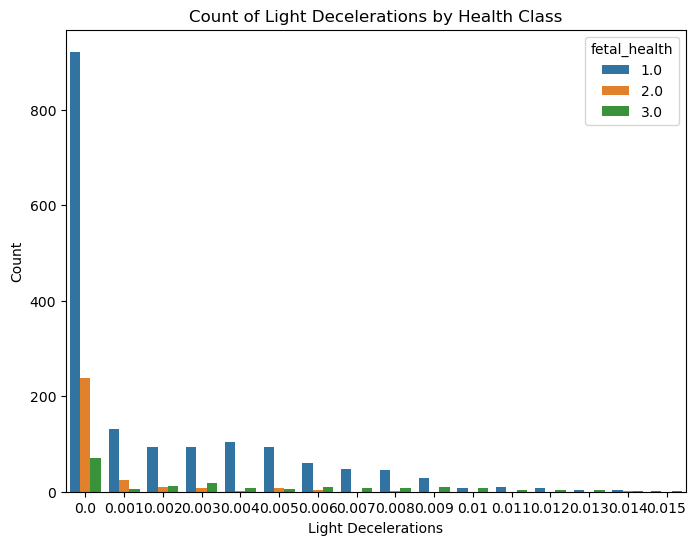

In [20]:
# 12. Countplot of Light Decelerations by Health Class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='light_decelerations', hue='fetal_health')
plt.title('Count of Light Decelerations by Health Class')
plt.xlabel('Light Decelerations')
plt.ylabel('Count')

In [21]:
# To store Model and accuracy, creating a list
models_and_accuracies = []

# SVM

In [22]:
# Split the data into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Development and Evaluation

In [24]:
# Create an SVM classifier (SVC)
svm_classifier = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
y_prob_svm = svm_classifier.predict_proba(X_test)

In [25]:
# Calculate ROC curves and AUC for each class in SVM
fpr_svm = {}
tpr_svm = {}
roc_auc_svm = {}

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


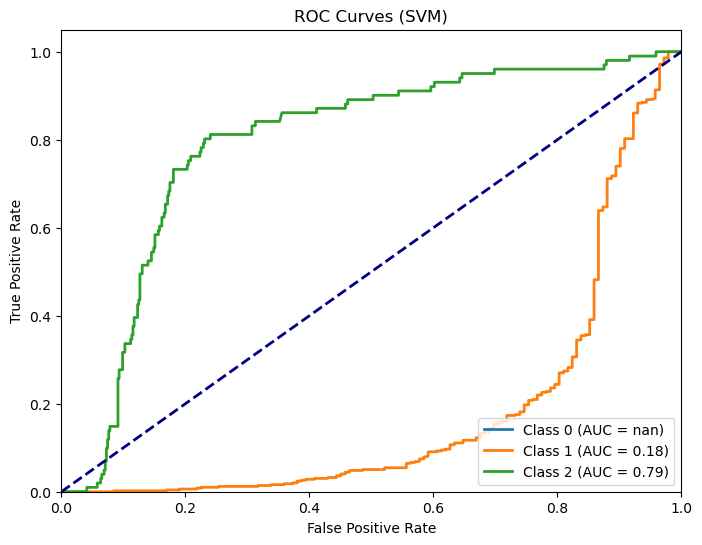

In [26]:
for i in range(len(svm_classifier.classes_)):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test == i, y_prob_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curves for each class in SVM
plt.figure(figsize=(8, 6))
for i in range(len(svm_classifier.classes_)):
    plt.plot(fpr_svm[i], tpr_svm[i], lw=2, label=f'Class {i} (AUC = {roc_auc_svm[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (SVM)')
plt.legend(loc='lower right')
plt.show()

In [27]:
# Generate predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Test Accuracy (SVM): {accuracy_svm:.3f}')


Test Accuracy (SVM): 0.878


In [28]:
models_and_accuracies.append(("SVM", svm_classifier, accuracy_svm))

In [29]:
# Generate a classification report for SVM
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.94       496
         2.0       0.67      0.57      0.62       101
         3.0       0.68      0.83      0.75        41

    accuracy                           0.88       638
   macro avg       0.76      0.78      0.77       638
weighted avg       0.88      0.88      0.88       638



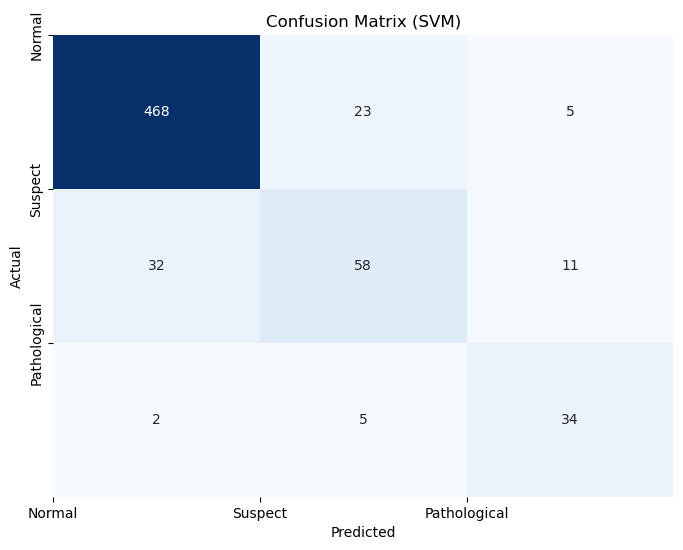

In [30]:
# Generate the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap for the confusion matrix (SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.yticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()


In [31]:
# Save the SVM classifier to a file
svm_model_filename = 'svm_classifier_model.pkl'
joblib.dump(svm_classifier, svm_model_filename)



print(f"SVM Classifier Model saved as '{svm_model_filename}'.")

SVM Classifier Model saved as 'svm_classifier_model.pkl'.


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier



In [33]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)



In [34]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Test Accuracy (Random Forest): {accuracy_rf:.3f}')



Test Accuracy (Random Forest): 0.944


In [35]:
models_and_accuracies.append(("Random Forest", rf_classifier, accuracy_rf))

In [36]:
# Generate a classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)



              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.91      0.76      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



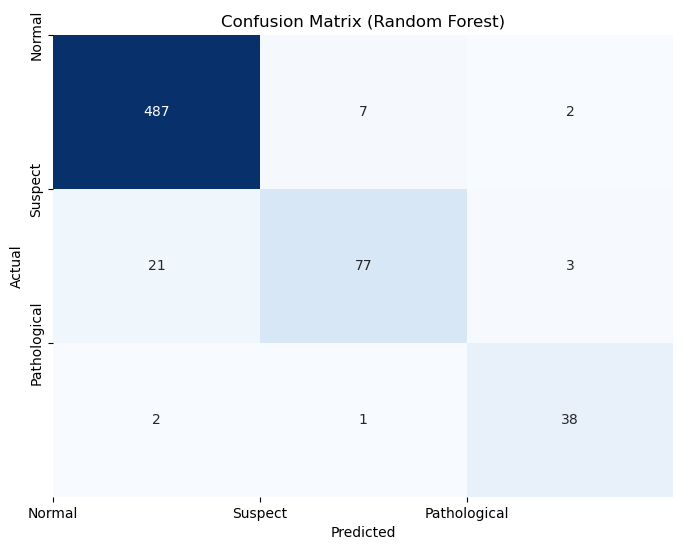

In [37]:
# Generate the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix (Random Forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.yticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()



In [38]:
# save the Random Forest classifier to a file
rf_model_filename = 'random_forest_classifier_model.pkl'
joblib.dump(rf_classifier, rf_model_filename)
print(f"Random Forest Classifier Model saved as '{rf_model_filename}'.")


Random Forest Classifier Model saved as 'random_forest_classifier_model.pkl'.


# Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)



In [41]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Test Accuracy (Gradient Boosting): {accuracy_gb:.3f}')



Test Accuracy (Gradient Boosting): 0.955


In [42]:
models_and_accuracies.append(("Gradient Boosting", gb_classifier, accuracy_gb))

In [43]:
# Generate a classification report for Gradient Boosting
report_gb = classification_report(y_test, y_pred_gb)
print(report_gb)



              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       496
         2.0       0.90      0.85      0.87       101
         3.0       0.95      0.95      0.95        41

    accuracy                           0.95       638
   macro avg       0.94      0.93      0.93       638
weighted avg       0.95      0.95      0.95       638



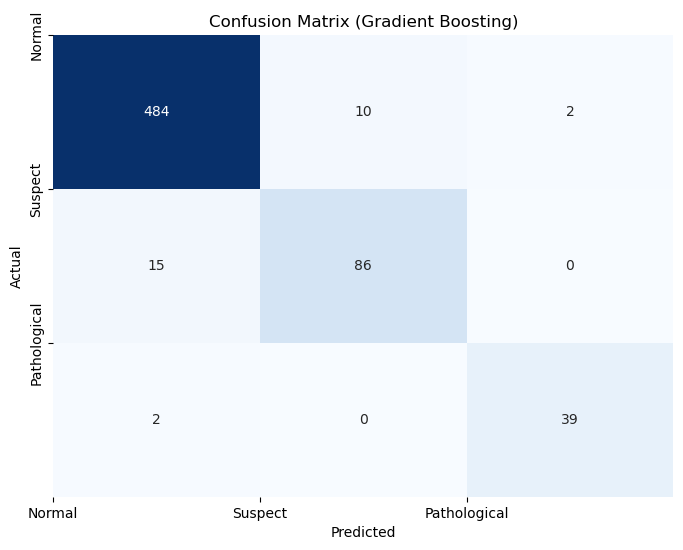

In [44]:
# Generate the confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Create a heatmap for the confusion matrix (Gradient Boosting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.yticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()



In [45]:
# save the Gradient Boosting classifier to a file
gb_model_filename = 'gradient_boosting_classifier_model.pkl'
joblib.dump(gb_classifier, gb_model_filename)
print(f"Gradient Boosting Classifier Model saved as '{gb_model_filename}'.")


Gradient Boosting Classifier Model saved as 'gradient_boosting_classifier_model.pkl'.


# k-Nearest Neighbors (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
# Create a KNN classifier with a specified number of neighbors (k)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Fit the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

In [48]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Test Accuracy (KNN): {accuracy_knn:.3f}')


Test Accuracy (KNN): 0.876


In [49]:
models_and_accuracies.append(("KNN", knn_classifier, accuracy_knn))

In [50]:
# Generate a classification report for KNN
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       496
         2.0       0.67      0.59      0.63       101
         3.0       0.82      0.76      0.78        41

    accuracy                           0.88       638
   macro avg       0.80      0.76      0.78       638
weighted avg       0.87      0.88      0.87       638



In [51]:
# Generate the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

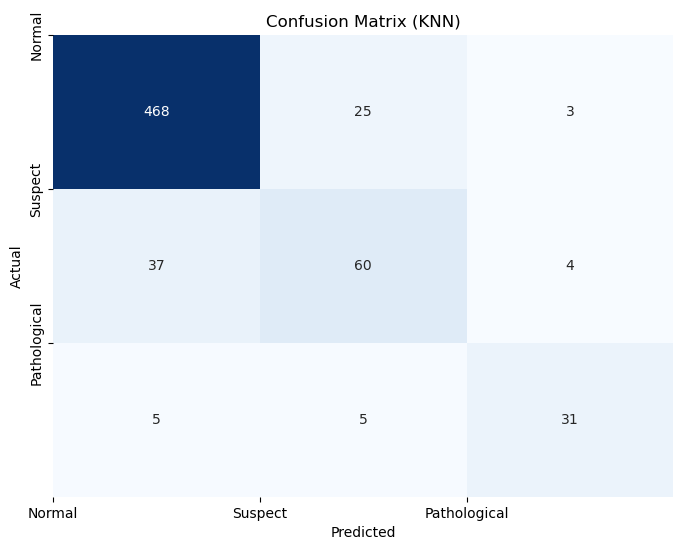

In [52]:
# Create a heatmap for the confusion matrix (KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.yticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()


In [53]:
# save the KNN classifier to a file
knn_model_filename = 'knn_classifier_model.pkl'
joblib.dump(knn_classifier, knn_model_filename)
print(f"KNN Classifier Model saved as '{knn_model_filename}'.")

KNN Classifier Model saved as 'knn_classifier_model.pkl'.


# Best Model

In [70]:
# Print model names and their accuracies
for model_name, _, accuracy in models_and_accuracies:
    print(f'{model_name} - Accuracy: {accuracy * 100:.2f}%')

SVM - Accuracy: 87.77%
Random Forest - Accuracy: 94.36%
Gradient Boosting - Accuracy: 95.45%
KNN - Accuracy: 87.62%


# Hyperparameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [57]:
# Get the best Random Forest model and its accuracy
best_rf_classifier = rf_grid_search.best_estimator_
best_rf_accuracy = accuracy_score(y_test, best_rf_classifier.predict(X_test))

In [58]:
print("Best Random Forest Model:")
print(best_rf_classifier)
print(f"Test Accuracy (Random Forest): {best_rf_accuracy:.3f}")

Best Random Forest Model:
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)
Test Accuracy (Random Forest): 0.939


In [59]:
# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3)
gb_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [60]:

# Get the best Gradient Boosting model and its accuracy
best_gb_classifier = gb_grid_search.best_estimator_
best_gb_accuracy = accuracy_score(y_test, best_gb_classifier.predict(X_test))


In [61]:

print("\nBest Gradient Boosting Model:")
print(best_gb_classifier)
print(f"Test Accuracy (Gradient Boosting): {best_gb_accuracy:.3f}")



Best Gradient Boosting Model:
GradientBoostingClassifier(max_depth=4, random_state=42)
Test Accuracy (Gradient Boosting): 0.950


# Sample Test Prediction

In [71]:
# Load the trained SVM model
svm_model_filename = 'gradient_boosting_classifier_model.pkl'
svm_classifier = joblib.load(svm_model_filename)

# Collect user input for feature values
baseline_value = float(input('Enter Baseline Value (or leave empty for 0): ') or 0)
accelerations = float(input('Enter Accelerations (or leave empty for 0): ') or 0)
fetal_movement = float(input('Enter Fetal Movement (or leave empty for 0): ') or 0)
uterine_contractions = float(input('Enter Uterine Contractions (or leave empty for 0): ') or 0)
light_decelerations = float(input('Enter Light Decelerations (or leave empty for 0): ') or 0)
severe_decelerations = float(input('Enter Severe Decelerations (or leave empty for 0): ') or 0)
prolonged_decelerations = float(input('Enter Prolonged Decelerations (or leave empty for 0): ') or 0)
abnormal_short_term_variability = float(input('Enter Abnormal Short-Term Variability (or leave empty for 0): ') or 0)
mean_value_of_short_term_variability = float(input('Enter Mean Value of Short-Term Variability (or leave empty for 0): ') or 0)
percentage_of_time_with_abnormal_long_term_variability = float(input('Enter Percentage of Time with Abnormal Long-Term Variability (or leave empty for 0): ') or 0)
mean_value_of_long_term_variability = float(input('Enter Mean Value of Long-Term Variability (or leave empty for 0): ') or 0)
histogram_width = float(input('Enter Histogram Width (or leave empty for 0): ') or 0)
histogram_min = float(input('Enter Histogram Min (or leave empty for 0): ') or 0)
histogram_max = float(input('Enter Histogram Max (or leave empty for 0): ') or 0)
histogram_number_of_peaks = float(input('Enter Histogram Number of Peaks (or leave empty for 0): ') or 0)
histogram_number_of_zeroes = float(input('Enter Histogram Number of Zeroes (or leave empty for 0): ') or 0)
histogram_mode = float(input('Enter Histogram Mode (or leave empty for 0): ') or 0)
histogram_mean = float(input('Enter Histogram Mean (or leave empty for 0): ') or 0)
histogram_median = float(input('Enter Histogram Median (or leave empty for 0): ') or 0)
histogram_variance = float(input('Enter Histogram Variance (or leave empty for 0): ') or 0)
histogram_tendency = float(input('Enter Histogram Tendency (or leave empty for 0): ') or 0)

# Create a numpy array with the user input data
user_input = np.array([[
    baseline_value, accelerations, fetal_movement, uterine_contractions,
    light_decelerations, severe_decelerations, prolonged_decelerations,
    abnormal_short_term_variability, mean_value_of_short_term_variability,
    percentage_of_time_with_abnormal_long_term_variability,
    mean_value_of_long_term_variability, histogram_width, histogram_min,
    histogram_max, histogram_number_of_peaks, histogram_number_of_zeroes,
    histogram_mode, histogram_mean, histogram_median, histogram_variance,
    histogram_tendency
]])

# Make a prediction using the trained SVM model
predicted_class = svm_classifier.predict(user_input)[0]

# Map the predicted class to its corresponding label
class_labels = {1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'}
predicted_label = class_labels.get(predicted_class, 'Unknown')

# Display the predicted fetal health class to the user
print(f'Predicted Fetal Health Class: {predicted_label}')


Enter Baseline Value (or leave empty for 0): 
Enter Accelerations (or leave empty for 0): 
Enter Fetal Movement (or leave empty for 0): 
Enter Uterine Contractions (or leave empty for 0): 
Enter Light Decelerations (or leave empty for 0): 
Enter Severe Decelerations (or leave empty for 0): 
Enter Prolonged Decelerations (or leave empty for 0): 
Enter Abnormal Short-Term Variability (or leave empty for 0): 
Enter Mean Value of Short-Term Variability (or leave empty for 0): 
Enter Percentage of Time with Abnormal Long-Term Variability (or leave empty for 0): 
Enter Mean Value of Long-Term Variability (or leave empty for 0): 
Enter Histogram Width (or leave empty for 0): 
Enter Histogram Min (or leave empty for 0): 
Enter Histogram Max (or leave empty for 0): 
Enter Histogram Number of Peaks (or leave empty for 0): 
Enter Histogram Number of Zeroes (or leave empty for 0): 
Enter Histogram Mode (or leave empty for 0): 
Enter Histogram Mean (or leave empty for 0): 
Enter Histogram Median (o

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# Flask UI

In [72]:
from flask import Flask, render_template, request
import numpy as np
import joblib

app = Flask(__name__)

# Load the trained SVM model
model_filename = 'gradient_boosting_classifier_model.pkl'
model = joblib.load(model_filename)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        try:
            # Collect user input for feature values
            feature_values = [
                float(request.form['baseline_value']),
                float(request.form['accelerations']),
                float(request.form['fetal_movement']),
                float(request.form['uterine_contractions']),
                float(request.form['light_decelerations']),
                float(request.form['severe_decelerations']),
                float(request.form['prolonged_decelerations']),
                float(request.form['abnormal_short_term_variability']),
                float(request.form['mean_value_of_short_term_variability']),
                float(request.form['percentage_of_time_with_abnormal_long_term_variability']),
                float(request.form['mean_value_of_long_term_variability']),
                float(request.form['histogram_width']),
                float(request.form['histogram_min']),
                float(request.form['histogram_max']),
                float(request.form['histogram_number_of_peaks']),
                float(request.form['histogram_number_of_zeroes']),
                float(request.form['histogram_mode']),
                float(request.form['histogram_mean']),
                float(request.form['histogram_median']),
                float(request.form['histogram_variance']),
                float(request.form['histogram_tendency'])
            ]

            # Create a numpy array with the user input data
            user_input = np.array([feature_values])

            # Make a prediction using the trained SVM model
            predicted_class = model.predict(user_input)[0]

            # Calculate the prediction score (probability)
            prediction_score = model.decision_function(user_input)[0]
            max_probability = 95.45

            # Map the predicted class to its corresponding label
            class_labels = {1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'}
            predicted_label = class_labels.get(predicted_class, 'Unknown')

            return render_template('result.html', predicted_label=predicted_label, max_probability=max_probability)
        except Exception as e:
            error_message = f'Error: {str(e)}'
            return render_template('error.html', error_message=error_message)

    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Nov/2023 13:19:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2023 13:19:41] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [30/Nov/2023 13:19:43] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2023 13:19:46] "GET / HTTP/1.1" 200 -
